<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>IMPORTS</a></span><ul class="toc-item"><li><span><a href="#Dictionary-Creation,-Duplicate-keys,-Strip-characters" data-toc-modified-id="Dictionary-Creation,-Duplicate-keys,-Strip-characters-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Dictionary Creation, Duplicate keys, Strip characters</a></span></li></ul></li><li><span><a href="#DATA-PLOTS" data-toc-modified-id="DATA-PLOTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA PLOTS</a></span></li></ul></div>

HPC_DATA_RUN='03/2019'

---
# IMPORTS

In [1]:
import csv
import sys
import os
import re
import glob
import copy
import fnmatch
import numpy as np
import datetime
import pickle
import collections
import itertools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import cm 
import pandas as pd

%matplotlib inline


## Dictionary Creation, Duplicate keys, Strip characters

In [2]:
# Nifty trick
class Customdictionary(dict):
    def __setitem__(self,key,value):
        try:
            self[key]
        except KeyError:
            super(Customdictionary,self).__setitem__(key,[])
        self[key].append(value)

In [3]:
def keys_exists(element, *keys):
    '''
    Check if *keys (nested) exists in `element` (dict).
    '''
    _element = element
    for key in keys:
        try:
            _element = _element[key]
        except KeyError:
            return False
    return True

In [4]:
def remove_chars(string):
    chars="[^0123456789\.]"
    return re.sub(chars,"",string)

---
# DATA PLOTS

In [5]:
dataset='analysis_0314/TIMERATIO_*.pkl'
globs=glob.glob(dataset)

In [6]:
unique_experiments=Customdictionary()
defecting_ratio_experiments=Customdictionary()
for g in globs:

    g_name=g.split('/')[1].split('_')
    n_robots=int(remove_chars(g_name[1]))
    n_liars=int(remove_chars(g_name[2]))
    defecting_ratio=float(n_liars/n_robots)
    noise=float(remove_chars(g_name[3]))
    density=float(remove_chars(g_name[4]))
    seed=remove_chars(g_name[5])
    working_robots=n_robots-n_liars
    
    
    unique_exp_key='TIMERATIO_nrobots{}_nliars{}_noise{}_density{}'.format(n_robots,n_liars,noise,density)
    if density==20.0:
        unique_experiments[unique_exp_key]=g
        if defecting_ratio in defecting_ratio_experiments.keys():
            possible_values=defecting_ratio_experiments[defecting_ratio]
            if unique_exp_key not in possible_values:
                defecting_ratio_experiments[defecting_ratio]=unique_exp_key
        else:
            defecting_ratio_experiments[defecting_ratio]=unique_exp_key

In [7]:
for key,val in defecting_ratio_experiments.items():
    print(key)
    for u in val:
        print('\t\t',u)
        seeds=unique_experiments[u]
        len_seeds=len(seeds) # Number of repeating seeds for a particular experiment setup
        
        entry_length=0
        for seed in seeds:
            with open(seed,"rb") as f:
                unpickler=pickle.Unpickler(f)
                data=unpickler.load()

                entry_length=max(entry_length,len(data.keys()))
                f.close()
       
        data_softthresh=np.ones((entry_length,len_seeds))*np.nan
        data_hardthresh=np.ones((entry_length,len_seeds))*np.nan
        dict_data={}
        
        usplit=u.split('_')
        n_robots=int(remove_chars(usplit[1]))
        n_liars=int(remove_chars(usplit[2]))
        noise=float(remove_chars(usplit[3]))
        density=float(remove_chars(usplit[4]))
        working_robots=n_robots-n_liars
        
        for seed_count,seed in enumerate(seeds):

            with open(seed,"rb") as f:
                unpickler=pickle.Unpickler(f)
                data=unpickler.load()

                           
                for key,value in data.items():
                
                    tstep=int(value[0])
                    soft_agree_count=float(value[1]/working_robots) # Agree_count_soft
                    hard_agree_count=float(value[2]/working_robots) # Agree_count_hard Opinion should be >=0.5
                    
                    if (soft_agree_count>1.0 or hard_agree_count>1.0):
                        raise Exception("Soft {} Hard {}".format(soft_agree_count,hard_agree_count))

                    data_softthresh[tstep,seed_count]=soft_agree_count
                    data_hardthresh[tstep,seed_count]=hard_agree_count
        
        dict_data['soft']=data_softthresh
        dict_data['hard']=data_hardthresh
        
        save_folder='analysis_dicts_0314/{}.pkl'.format(u)
        
        f=open(save_folder,"wb")
        pickle.dump(dict_data,f)
        f.close()


0.5
		 TIMERATIO_nrobots64_nliars32_noise0.4_density20.0
		 TIMERATIO_nrobots16_nliars8_noise0.2_density20.0
		 TIMERATIO_nrobots16_nliars8_noise0.0_density20.0
		 TIMERATIO_nrobots256_nliars128_noise0.4_density20.0
		 TIMERATIO_nrobots16_nliars8_noise0.4_density20.0
		 TIMERATIO_nrobots256_nliars128_noise0.2_density20.0
		 TIMERATIO_nrobots64_nliars32_noise0.0_density20.0
		 TIMERATIO_nrobots64_nliars32_noise0.2_density20.0
		 TIMERATIO_nrobots256_nliars128_noise0.0_density20.0
0.75
		 TIMERATIO_nrobots16_nliars12_noise0.2_density20.0
		 TIMERATIO_nrobots64_nliars48_noise0.4_density20.0
		 TIMERATIO_nrobots16_nliars12_noise0.4_density20.0
		 TIMERATIO_nrobots16_nliars12_noise0.0_density20.0
		 TIMERATIO_nrobots64_nliars48_noise0.0_density20.0
		 TIMERATIO_nrobots256_nliars192_noise0.4_density20.0
		 TIMERATIO_nrobots256_nliars192_noise0.0_density20.0
		 TIMERATIO_nrobots64_nliars48_noise0.2_density20.0
		 TIMERATIO_nrobots256_nliars192_noise0.2_density20.0
0.0
		 TIMERATIO_nrobots16_n

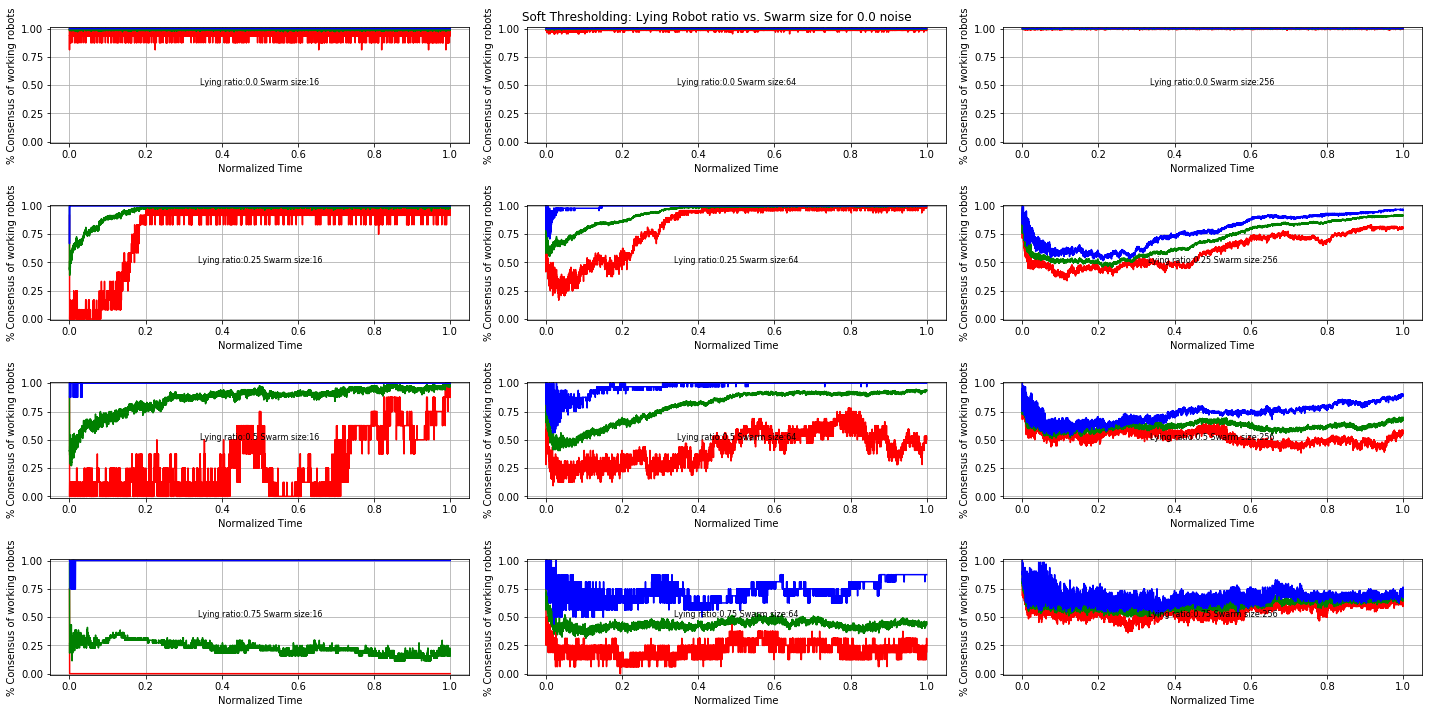

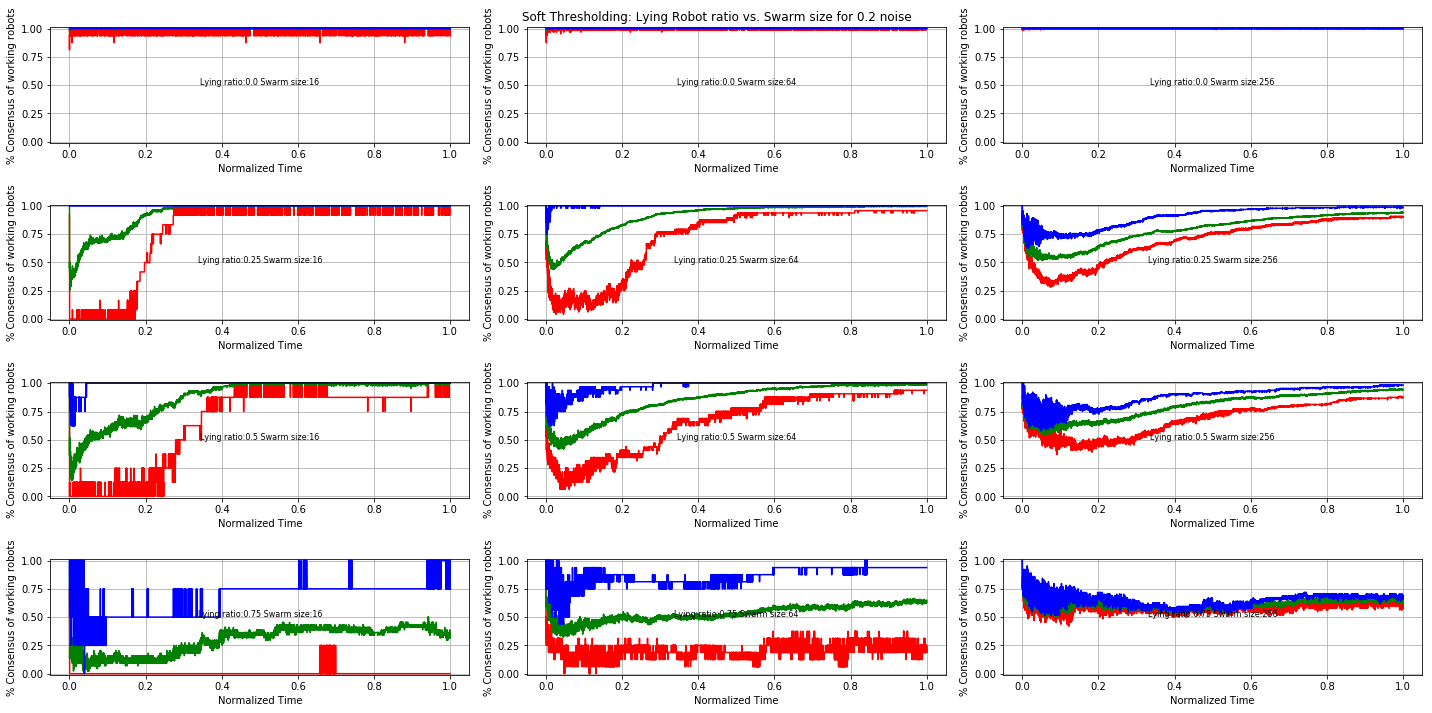

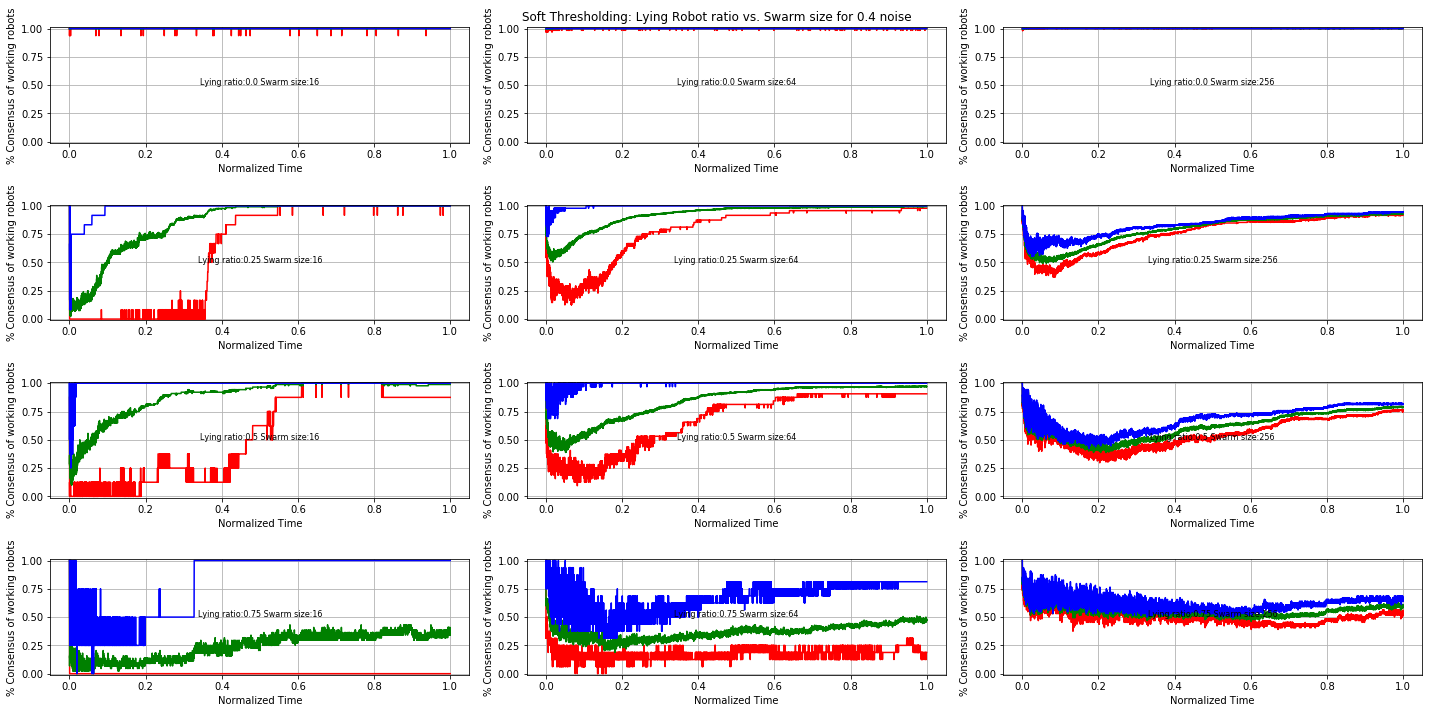

In [8]:
nrobots=[16,64,256]
noise=[0.0,0.2,0.4]
for n in noise:
#     fig,ax=plt.subplots(4,3,sharex='col',sharey='row', figsize=(20,10))
    fig,ax=plt.subplots(4,3,figsize=(20,10))
    combinations=list(itertools.product(nrobots,[n]))

    sorted_def_ratios=sorted(defecting_ratio_experiments.keys())
    for i,k in enumerate(sorted_def_ratios):
        vals=defecting_ratio_experiments[k]
        for c in combinations:
            nr=c[0]
            
            if nr==nrobots[0]:j=0
            elif nr==nrobots[1]:j=1
            elif nr==nrobots[2]:j=2
            
            
            n=c[1]
            nl=int(k*nr)
            satisfy_str='TIMERATIO_nrobots{}_nliars{}_noise{}_density20.0'.format(nr,nl,n)
            satisfy_exp=[exp for exp in vals if exp==satisfy_str]

            for s_exp in satisfy_exp:

                with open('analysis_dicts_0314/'+s_exp+'.pkl',"rb") as f:
                    unpickler=pickle.Unpickler(f)
                    data=unpickler.load()
                    soft_threshold=data['soft']

                    soft_thresh_mean=np.nanmean(soft_threshold,axis=1).reshape((soft_threshold.shape[0],1))
                    soft_thresh_min=np.nanmin(soft_threshold,axis=1).reshape((soft_threshold.shape[0],1))
                    soft_thresh_max=np.nanmax(soft_threshold,axis=1).reshape((soft_threshold.shape[0],1))

                    analyzed_soft_thresh=np.hstack((soft_thresh_min,soft_thresh_mean,soft_thresh_max))

                    xrange=np.arange(0,len(analyzed_soft_thresh[:,0]))/len(analyzed_soft_thresh[:,0])
                    ax[i,j].plot(xrange,analyzed_soft_thresh[:,0],'r-')
                    ax[i,j].plot(xrange,analyzed_soft_thresh[:,1],'g-')
                    ax[i,j].plot(xrange,analyzed_soft_thresh[:,2],'b-')
                    
                    plot_label='Lying ratio:{} Swarm size:{}'.format(k,nr)
                    ax[i, j].text(0.5, 0.5, plot_label,fontsize=8, ha='center')
                    ax[i,j].set_ylim(-0.01,1.01)
                    ax[i,j].set_xlabel('Normalized Time')
                    ax[i,j].set_ylabel('% Consensus of working robots')
                    ax[i,j].grid(b=1,which='both',axis='both')
    fig.suptitle('Soft Thresholding: Lying Robot ratio vs. Swarm size for {} noise'.format(n))
    fig.tight_layout()
    plt.tight_layout()
    fig
    fig_name='softthresh_lyingrobotratio_swarmsize_{}noise.eps'.format(n)
    fig.savefig(fig_name,dpi=500)

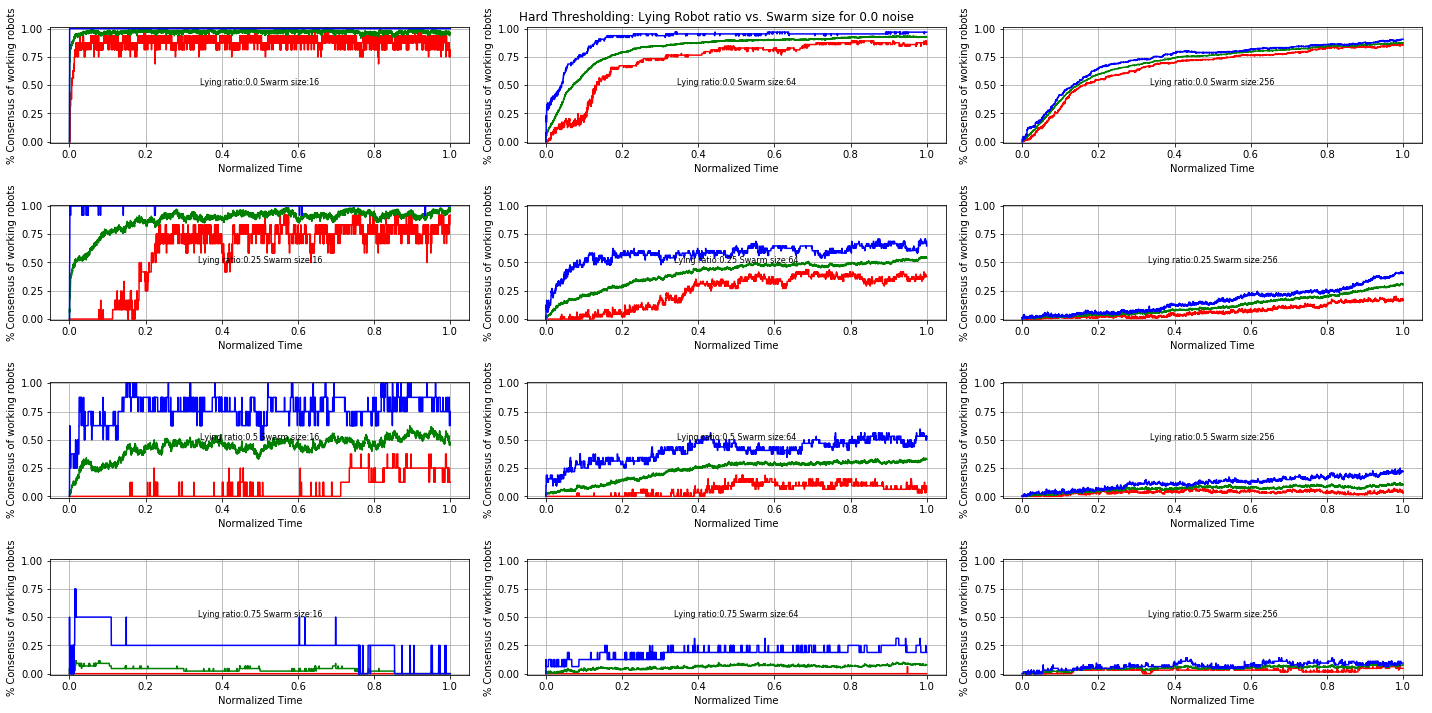

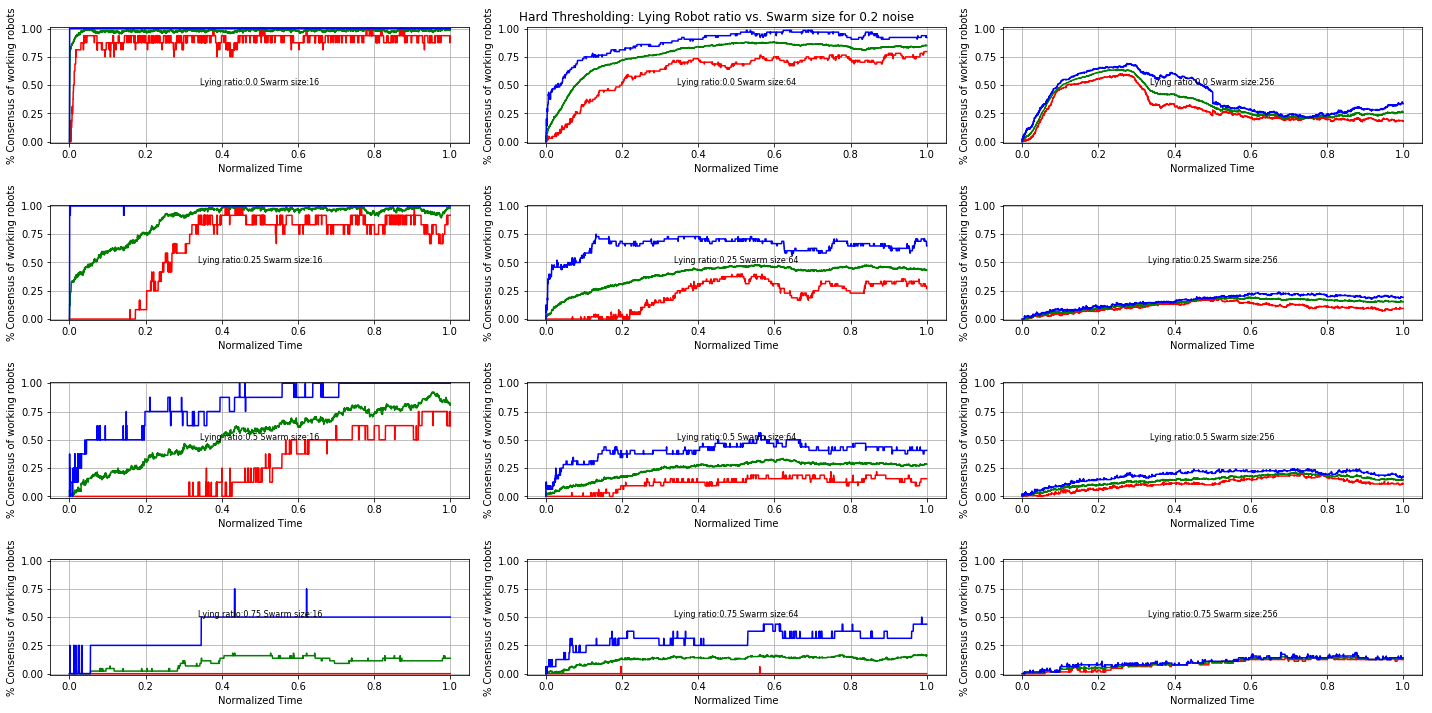

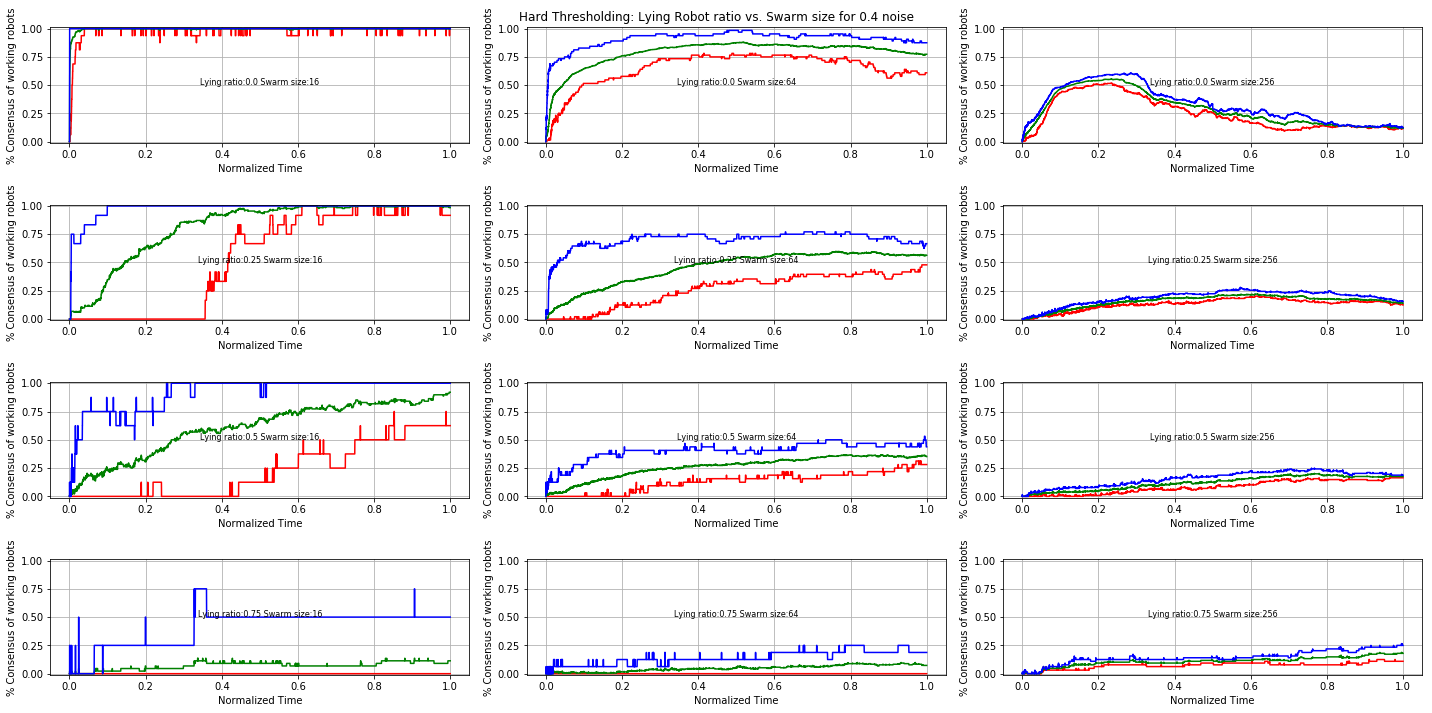

In [9]:
nrobots=[16,64,256]
noise=[0.0,0.2,0.4]
for n in noise:
#     fig,ax=plt.subplots(4,3,sharex='col',sharey='row', figsize=(20,10))
    fig,ax=plt.subplots(4,3,figsize=(20,10))
    combinations=list(itertools.product(nrobots,[n]))

    sorted_def_ratios=sorted(defecting_ratio_experiments.keys())
    for i,k in enumerate(sorted_def_ratios):
        vals=defecting_ratio_experiments[k]
        for c in combinations:
            nr=c[0]
            
            if nr==nrobots[0]:j=0
            elif nr==nrobots[1]:j=1
            elif nr==nrobots[2]:j=2
            
            
            n=c[1]
            nl=int(k*nr)
            satisfy_str='TIMERATIO_nrobots{}_nliars{}_noise{}_density20.0'.format(nr,nl,n)
            satisfy_exp=[exp for exp in vals if exp==satisfy_str]

            for s_exp in satisfy_exp:

                with open('analysis_dicts_0314/'+s_exp+'.pkl',"rb") as f:
                    unpickler=pickle.Unpickler(f)
                    data=unpickler.load()
                    hard_threshold=data['hard']
                    
                    hard_thresh_mean=np.nanmean(hard_threshold,axis=1).reshape((hard_threshold.shape[0],1))
                    hard_thresh_min=np.nanmin(hard_threshold,axis=1).reshape((hard_threshold.shape[0],1))
                    hard_thresh_max=np.nanmax(hard_threshold,axis=1).reshape((hard_threshold.shape[0],1))

                    analyzed_hard_thresh=np.hstack((hard_thresh_min,hard_thresh_mean,hard_thresh_max))

                    xrange=np.arange(0,len(analyzed_hard_thresh[:,0]))/len(analyzed_hard_thresh[:,0])
                    ax[i,j].plot(xrange,analyzed_hard_thresh[:,0],'r-')
                    ax[i,j].plot(xrange,analyzed_hard_thresh[:,1],'g-')
                    ax[i,j].plot(xrange,analyzed_hard_thresh[:,2],'b-')
                    
                    plot_label='Lying ratio:{} Swarm size:{}'.format(k,nr)
                    ax[i, j].text(0.5, 0.5, plot_label,fontsize=8, ha='center')
                    ax[i,j].set_ylim(-0.01,1.01)
                    ax[i,j].set_xlabel('Normalized Time')
                    ax[i,j].set_ylabel('% Consensus of working robots')
                    ax[i,j].grid(b=1,which='both',axis='both')
    fig.suptitle('Hard Thresholding: Lying Robot ratio vs. Swarm size for {} noise'.format(n))
    fig.tight_layout()
    plt.tight_layout()
    fig
    fig_name='hardthresh_lyingrobotratio_swarmsize_{}noise.eps'.format(n)
    fig.savefig(fig_name,dpi=500)